In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\predict_energy_consumption.csv")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.967142,31.723781,2.190688,648.318007,177.621142
1,18.617357,27.319749,0.367214,74.105423,235.830819
2,26.476885,64.550117,1.080258,375.468928,229.718452
3,35.230299,69.453301,3.388606,803.814545,229.861478
4,17.658466,22.211030,8.025857,433.472233,230.766187


In [3]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [4]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
       temperature     humidity   wind_speed  solar_irradiance  \
count  1000.000000  1000.000000  1000.000000       1000.000000   
mean     20.193321    55.255416     4.944950        493.236966   
std       9.792159    20.184978     2.889197        285.687493   
min     -12.412673    20.225278     0.000116          0.030719   
25%      13.524097    37.303938     2.565235        248.421206   
50%      20.253006    56.128822     4.917106        489.508500   
75%      26.479439    72.242304     7.386289

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from sklearn.metrics import r2_score
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 59233.8125 - mae: 240.1857 - val_loss: 57662.1875 - val_mae: 237.3245
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59803.0508 - mae: 241.7656 - val_loss: 57150.0742 - val_mae: 236.2538
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58309.7930 - mae: 238.6298 - val_loss: 56321.1680 - val_mae: 234.5123
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55833.4258 - mae: 233.5952 - val_loss: 55009.1484 - val_mae: 231.7269
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55840.4766 - mae: 233.1513 - val_loss: 52999.3516 - val_mae: 227.3971
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52917.2422 - mae: 226.9793 - val_loss: 50087.8828 - val_mae: 220.9771
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50445.3633 - mae: 221.6968 - val_loss: 46098.9453 - val_mae: 211.8770
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44884.4258 - mae: 209.2583 - val_loss: 41022.

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 637.2090 - mae: 21.2270  
Test Mean Absolute Error: 20.84


In [11]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


0.5757500290166695

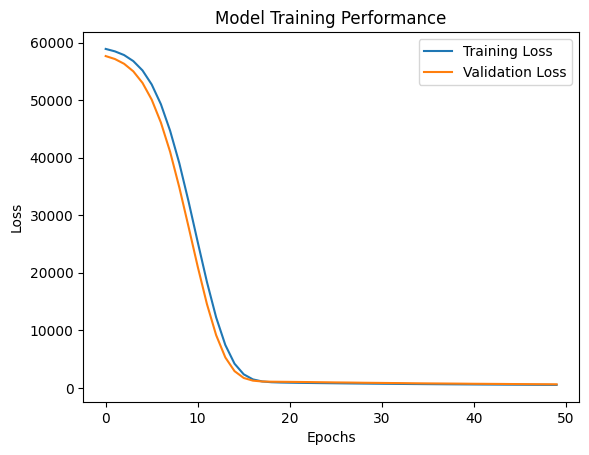

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [13]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[222.20406],
       [258.80292],
       [315.38416],
       [224.61926],
       [263.4123 ],
       [202.65448],
       [247.37292],
       [294.2696 ],
       [248.4496 ],
       [245.24995],
       [307.2564 ],
       [231.15463],
       [203.86714],
       [221.77907],
       [253.25056],
       [243.11946],
       [265.97192],
       [202.47423],
       [261.41693],
       [263.01727],
       [202.04198],
       [255.7405 ],
       [253.36794],
       [219.58232],
       [215.64839],
       [199.51372],
       [227.15169],
       [245.44077],
       [201.0828 ],
       [254.57758],
       [277.63678],
       [274.09848],
       [204.73528],
       [272.60492],
       [204.29204],
       [171.35304],
       [230.9514 ],
       [184.70819],
       [253.21413],
       [278.59155],
       [210.33154],
       [192.1244 ],
       [203.79039],
       [212.20598],
       [185.59439],
       [241.68796],
       [217.99693],
       [235.23174],
       [225.585  ],
       [224.37822],


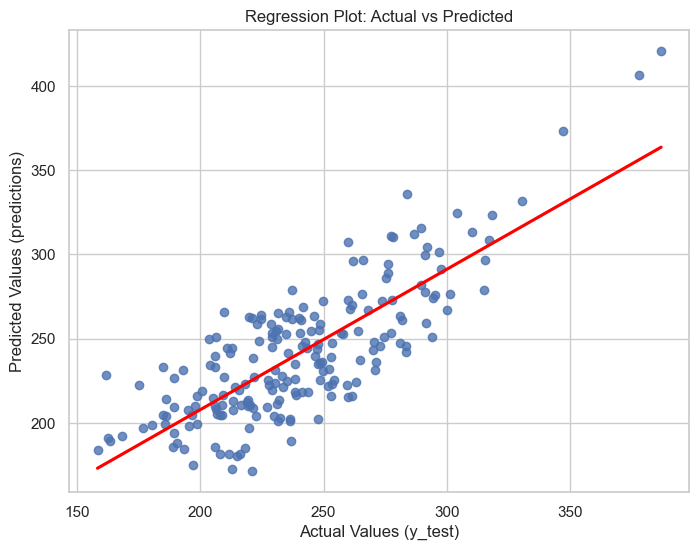

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create scatter + regression line plot
sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})

# Add labels
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (predictions)")
plt.title("Regression Plot: Actual vs Predicted")
plt.show()